Machine learning algoritma naive bayes  
Oleh : edy kurniawan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#memasukan data latih
datalatih = pd.read_excel("data testing.xlsx")
datalatih.head(11)
#Prestasi Siswa = 1 == Ya 
#Prestasi Siswa = 2 == Tidak
#Prestasi Sekolah = 1 == Cukup
#Prestasi Sekolah = 2 == Baik

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,92,86,88,1,1
1,Matematika,90,86,85,1,2
2,Sastra Inggris,82,87,92,2,1
3,Matematika,93,82,85,1,1
4,Sastra Inggris,86,85,88,1,1
5,Matematika,91,83,84,2,2
6,Sastra Indonesia,88,80,90,2,1
7,Sastra Indonesia,84,82,88,1,1
8,Sastra Inggris,79,89,85,1,1
9,Sastra Inggris,83,88,81,2,2


In [2]:
datalatih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
Jurusan             11 non-null object
Matematika          11 non-null int64
Bahasa Inggris      11 non-null int64
Bahasa Indonesia    11 non-null int64
Prestasi Siswa      11 non-null int64
Prestasi Sekolah    11 non-null int64
dtypes: int64(5), object(1)
memory usage: 656.0+ bytes


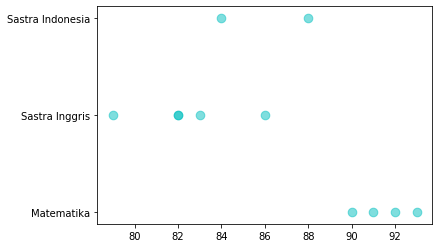

In [3]:
from sklearn.cluster import KMeans
#Memvisualkan persebaran data
plt.scatter(datalatih.Matematika, datalatih.Jurusan, s = 75, c = "c", marker = "o", alpha = 0.5)
plt.show()

In [6]:
x = datalatih.drop(["Jurusan"], axis=1)
x.head(11)

,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,92,86,88,1,1
1,90,86,85,1,2
2,82,87,92,2,1
3,93,82,85,1,1
4,86,85,88,1,1
5,91,83,84,2,2
6,88,80,90,2,1
7,84,82,88,1,1
8,79,89,85,1,1
9,83,88,81,2,2


In [7]:
y = datalatih["Jurusan"]
y.head(11)

0           Matematika
1           Matematika
2       Sastra Inggris
3           Matematika
4       Sastra Inggris
5           Matematika
6     Sastra Indonesia
7     Sastra Indonesia
8       Sastra Inggris
9       Sastra Inggris
10      Sastra Inggris
Name: Jurusan, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("data uji akurasi.xlsx")
datauji.head(11)

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,92,82,85,1,1
1,Matematika,91,83,85,2,2
2,Sastra Inggris,82,80,88,1,1
3,Sastra Indonesia,88,80,90,2,1
4,Sastra Inggris,83,85,84,2,1
5,Sastra Indonesia,88,82,88,1,1


In [9]:
x_test = datauji.drop(["Jurusan"], axis=1)
x_test.head(11)

,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,92,82,85,1,1
1,91,83,85,2,2
2,82,80,88,1,1
3,88,80,90,2,1
4,83,85,84,2,1
5,88,82,88,1,1


In [10]:
y_uji = datauji["Jurusan"]
y_uji.head(11)

0          Matematika
1          Matematika
2      Sastra Inggris
3    Sastra Indonesia
4      Sastra Inggris
5    Sastra Indonesia
Name: Jurusan, dtype: object

In [17]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Matematika' 'Matematika' 'Sastra Indonesia' 'Sastra Indonesia'
 'Sastra Inggris' 'Sastra Indonesia']


In [16]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.8333333333333334


In [12]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_uji, Y_predict))

                  precision    recall  f1-score   support

      Matematika       1.00      1.00      1.00         2
Sastra Indonesia       0.67      1.00      0.80         2
  Sastra Inggris       1.00      0.50      0.67         2

        accuracy                           0.83         6
       macro avg       0.89      0.83      0.82         6
    weighted avg       0.89      0.83      0.82         6

